In [1]:
from convokit import Corpus
from scipy.stats import entropy
import numpy as np, pandas as pd, seaborn as sns, os 

sns.set_theme("paper", font_scale=1.2)

## Descriptive Statisitcs 

In [3]:
path = os.getcwd()[:-8]
corpus_name = "corpus"
min_lines = 0

corpus = Corpus(f'{path}data/processed/{corpus_name}') #merge_lines = True)
corpus = corpus.filter_conversations_by(lambda convo: len(convo._utterance_ids) > min_lines )

In [4]:
corpus.print_summary_stats()

Number of Speakers: 73
Number of Utterances: 5539
Number of Conversations: 103


### Histogram of conversation length

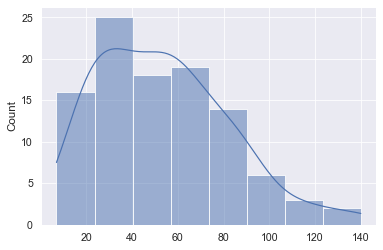

In [16]:
length = [len(convo._utterance_ids) for convo in corpus.iter_conversations()]
sns.histplot(length,kde=True);

In [6]:
pd.Series(length).describe()

count    103.000000
mean      53.776699
std       28.513819
min        7.000000
25%       30.000000
50%       53.000000
75%       72.000000
max      140.000000
dtype: float64

### Histograms of average lines by first speaker and participation entropy

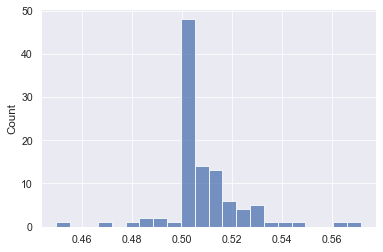

In [15]:
averages = []
for convo in corpus.iter_conversations():
    utt1 = corpus.get_utterance(convo._utterance_ids[0])
    who = [ utt.speaker.id == utt1.speaker.id for utt in convo.traverse('preorder')] 
    p = sum(who)/len(who)
    averages.append(p)
sns.histplot(averages);
# Speaker 1 (the person who starts the conversation) says more lines on average than Speaker 2

In [8]:
pd.Series(averages).describe()

count    103.000000
mean       0.507391
std        0.015722
min        0.450000
25%        0.500000
50%        0.504202
75%        0.513336
max        0.571429
dtype: float64

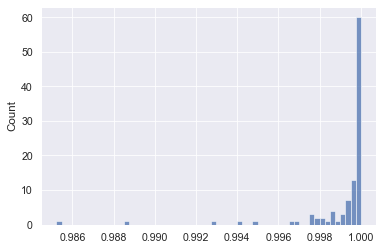

In [14]:
hes = [entropy([p, 1 - p], base=2) for p in averages]
sns.histplot(hes);

In [10]:
pd.Series(hes).describe()

count    103.000000
mean       0.999135
std        0.002120
min        0.985228
25%        0.999411
50%        0.999895
75%        1.000000
max        1.000000
dtype: float64

### Histogram of time

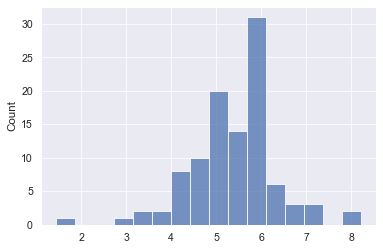

In [12]:
times = []
for convo in corpus.iter_conversations():
    lastutt = corpus.get_utterance(convo._utterance_ids[-1])
    times.append(int(lastutt.timestamp[3]) + int(lastutt.timestamp[5:7])/60)
sns.histplot(times);


In [13]:
pd.Series(times).describe()

count    103.000000
mean       5.396764
std        0.976812
min        1.450000
25%        4.908333
50%        5.550000
75%        5.950000
max        8.216667
dtype: float64